In [1]:
#importing required libraries
import yfinance as yf

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import plotly.express as px

from sklearn.linear_model import LinearRegression

#getting historic stock data from yfinance
stocks_list = ['BHARTIARTL.NS', 'ITC.NS', 'HDFCBANK.NS','^NSEI']

data = yf.download(stocks_list, period='5y')['Adj Close']

data.columns = ['BHARTIARTL','HDFCBANK', 'ITC','NIFTY_50']

[*********************100%%**********************]  4 of 4 completed


In [2]:
#Normalizing Stock Prices

def normalize_prices(df):

    df_ = df.copy()

    for stock in df_.columns:

        df_[stock] = df_[stock]/df_[stock][0]

    return df_

norm_df = normalize_prices(data)

# Plotting the normalized stock prices

fig = px.line(title = "Normalized stock prices")

for stock in norm_df.columns:

    fig.add_scatter(x = norm_df.index.values, y = norm_df[stock], name = stock)

fig.show()

Text(0.5, 1.0, 'Daily returns of the stocks')

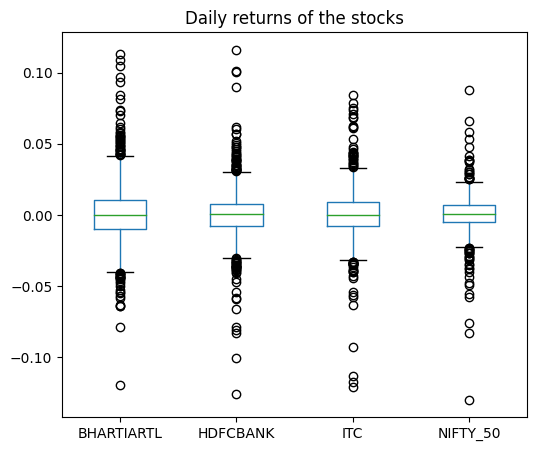

In [3]:
# Calculating Daily % change in stock prices

daily_returns = norm_df.pct_change()

daily_returns.iloc[0,:] = 0

# Boxplot of daily returns (in %)

daily_returns.boxplot(figsize=(6, 5), grid=False)

plt.title("Daily returns of the stocks")

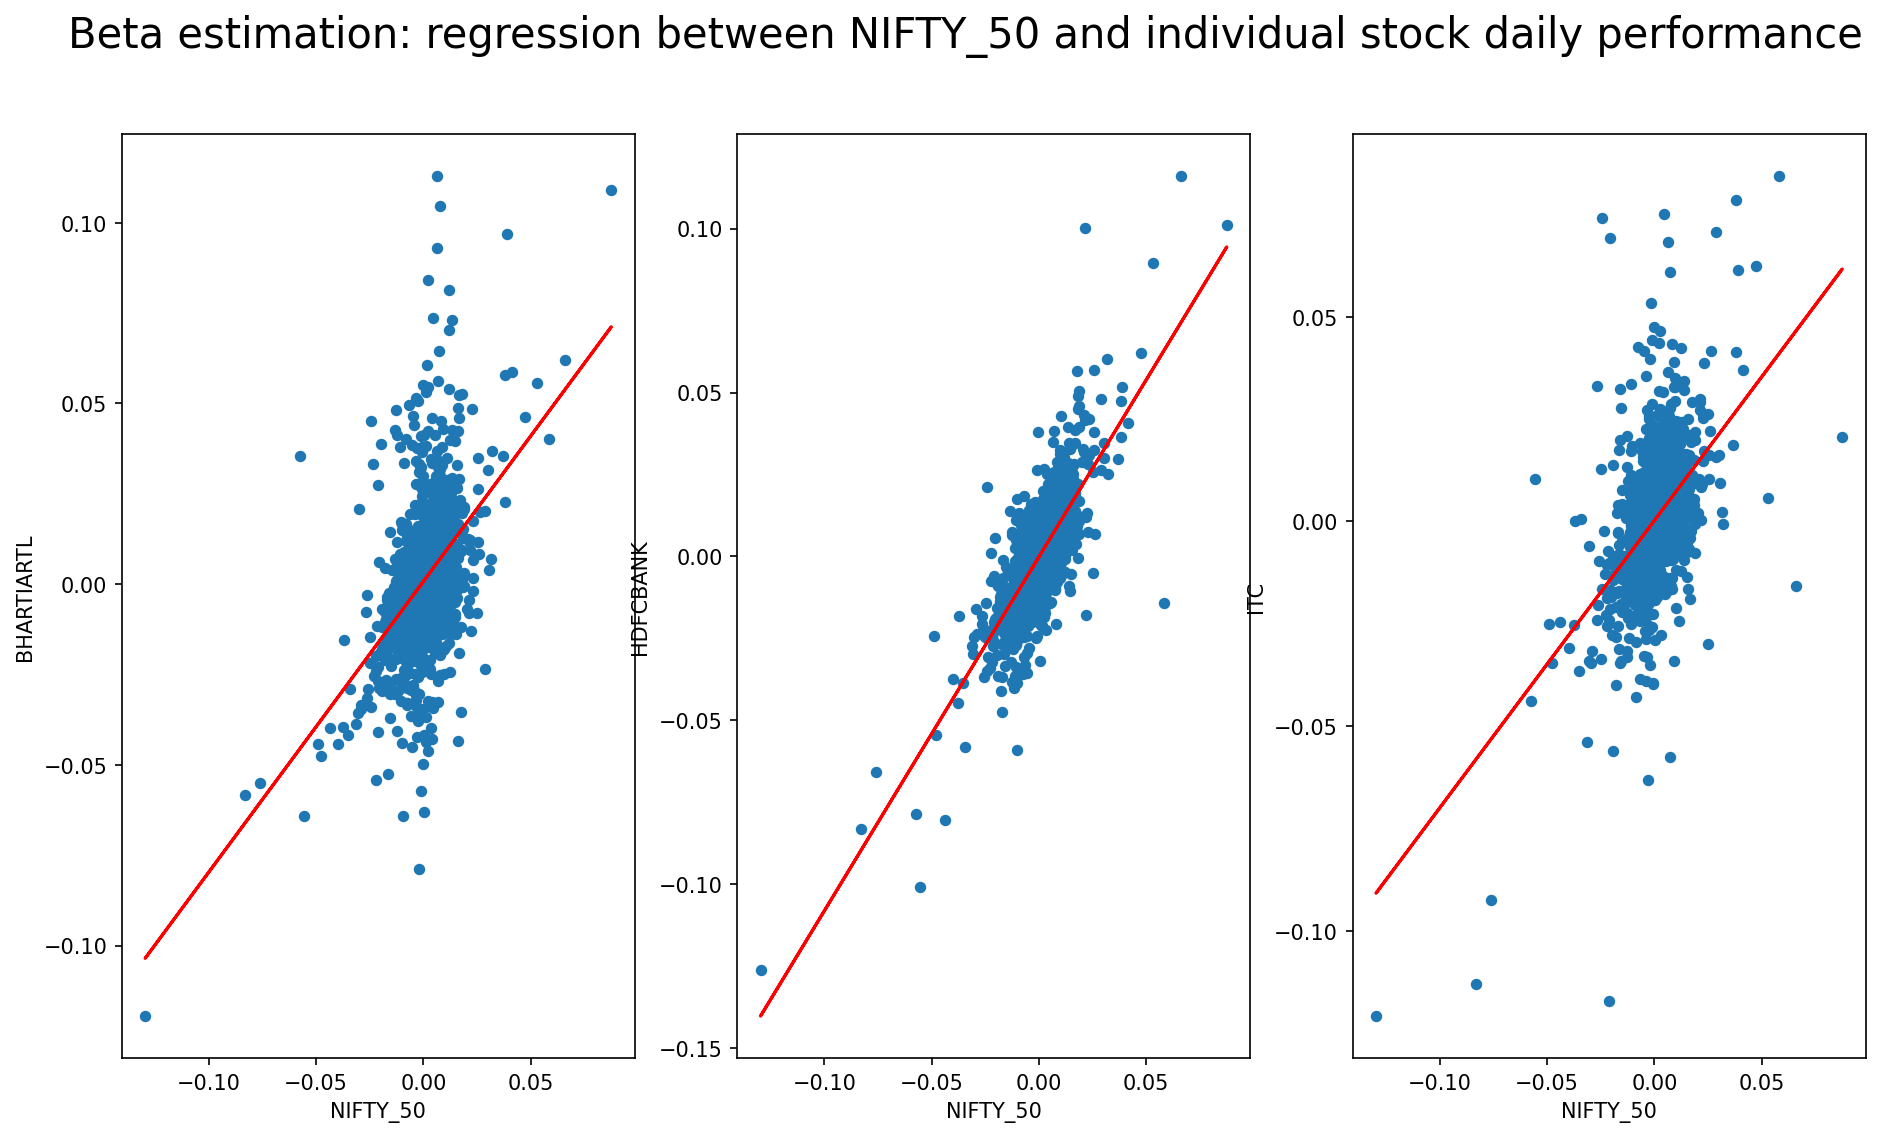

In [4]:
# Initializing empty dictionaries to save results

beta,alpha = dict(), dict()

# Make a subplot

fig, axes = plt.subplots(1,3, dpi=150, figsize=(15,8))

axes = axes.flatten()

# Loop on every daily stock return

for idx, stock in enumerate(daily_returns.columns.values[:-1]):

    # scatter plot between stocks and the NSE

    daily_returns.plot(kind = "scatter", x = "NIFTY_50", y = stock, ax=axes[idx])

    # Fit a line (regression using polyfit of degree 1)

    b_, a_ = np.polyfit(daily_returns["NIFTY_50"] ,daily_returns[stock], 1)

    regression_line = b_ * daily_returns["NIFTY_50"] + a_

    axes[idx].plot(daily_returns["NIFTY_50"], regression_line, "-", color = "r")

    # save the regression coeeficient for the current stock

    beta[stock] = b_

    alpha[stock] = a_

plt.suptitle("Beta estimation: regression between NIFTY_50 and individual stock daily performance", size=20)

plt.show()

In [5]:
keys = list(beta.keys())
beta_3 = dict()

for k in keys:

    beta_3[k] = [daily_returns[[k,'NIFTY_50']].cov()/daily_returns['NIFTY_50'].var()][0].iloc[0,1]


In [6]:
# Initialize the expected return dictionary

ER = dict()

rf = 0.0733

trading_days = 250

# Estimate the expected return of the market using the daily returns

rm = daily_returns["NIFTY_50"].mean() * trading_days

for k in keys:

    # Calculate return for every security using CAPM

    ER[k] = rf + beta[k] * (rm-rf)

for k in keys:

    print("Expected return based on CAPM model for {} is {}%".format(k, round(ER[k]*100, 2)))

# Calculating historic returns

for k in keys:

    print('Return based on historical data for {} is {}%'.format(k, round(daily_returns[k].mean() * 100 * trading_days, 2)))

Expected return based on CAPM model for BHARTIARTL is 13.41%
Expected return based on CAPM model for HDFCBANK is 15.49%
Expected return based on CAPM model for ITC is 12.63%
Return based on historical data for BHARTIARTL is 31.36%
Return based on historical data for HDFCBANK is 12.82%
Return based on historical data for ITC is 15.67%
